In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

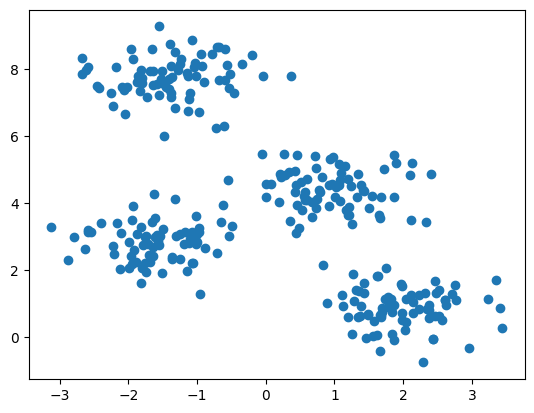

In [2]:
from sklearn.datasets import make_blobs
X,y_true=make_blobs(n_samples=300, centers=4,
                   cluster_std=0.60,random_state=0)

plt.scatter(X[:,0],X[:,1])

In [39]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)
kmeans.fit(X,y_true)
y_pred=kmeans.predict(X)

In [46]:
y_pred

array([2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 3, 1, 0, 1, 2, 0, 0, 2, 3, 3, 2, 2,
       0, 3, 3, 0, 2, 0, 3, 0, 1, 1, 0, 1, 1, 1, 1, 1, 3, 2, 0, 3, 0, 0,
       3, 3, 1, 3, 1, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 0, 1, 3, 3, 3,
       1, 2, 1, 3, 0, 3, 1, 3, 3, 1, 3, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0,
       1, 1, 0, 2, 1, 3, 3, 0, 2, 2, 0, 3, 1, 2, 1, 2, 0, 2, 2, 0, 1, 0,
       3, 3, 2, 1, 2, 0, 1, 2, 2, 0, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 3,
       3, 2, 1, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 3, 1, 0, 1, 1, 1, 0, 1, 0,
       2, 3, 1, 3, 2, 0, 1, 0, 0, 2, 0, 3, 3, 0, 2, 0, 0, 1, 2, 0, 3, 1,
       2, 2, 0, 3, 2, 0, 3, 3, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 3, 3, 3, 0,
       3, 1, 0, 3, 2, 3, 0, 1, 3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 2, 0,
       1, 2, 2, 3, 2, 3, 0, 1, 1, 0, 0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 2, 0,
       2, 1, 1, 1, 1, 3, 3, 1, 0, 3, 2, 0, 3, 3, 3, 2, 2, 1, 0, 0, 3, 2,
       1, 3, 0, 1, 0, 2, 2, 3, 3, 0, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 2,
       1, 3, 1, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1, 3])

In [47]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(y_pred,y_true)
acc

0.25

In [3]:
from sklearn.datasets import load_sample_image

ch=load_sample_image("flower.jpg")
ch.shape


(427, 640, 3)

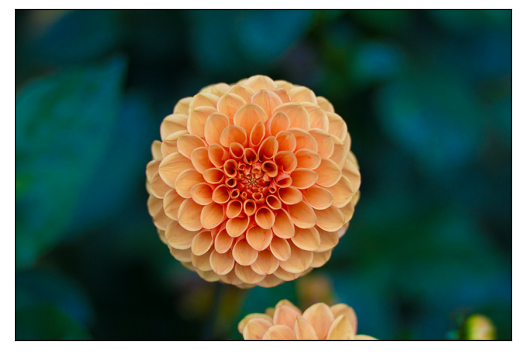

In [4]:
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(ch)

In [5]:
ch

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [17]:
data=ch/255
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [18]:
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(data)

In [19]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [20]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_color=kmeans.cluster_centers_[kmeans.predict(data)]
kmeans

MiniBatchKMeans(n_clusters=16)

In [21]:
china_recolored=new_color.reshape(ch.shape)


Text(0.5, 1.0, 'Compressed image')

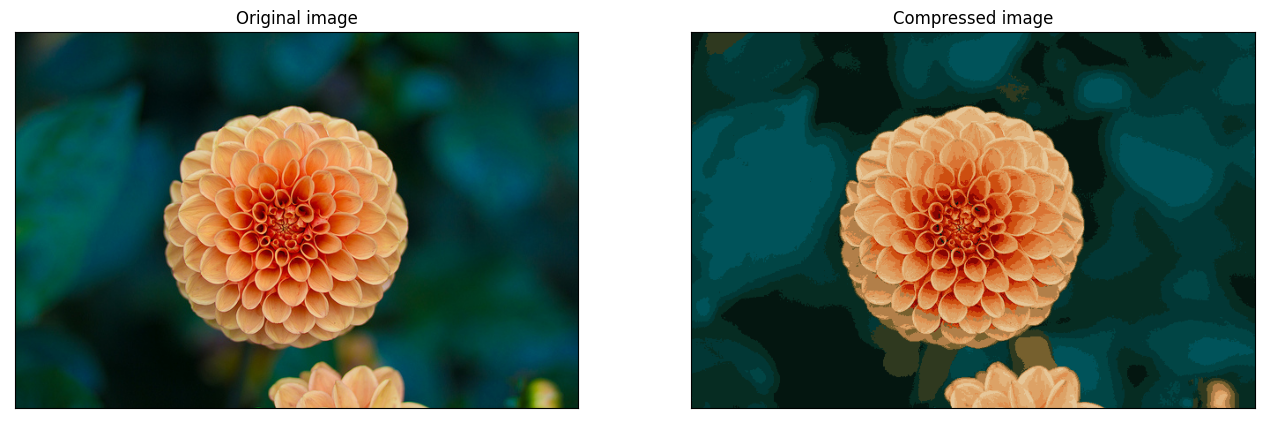

In [23]:
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=dict(xticks=[],yticks=[]))
ax[0].imshow(ch)
ax[0].set_title("Original image")
ax[1].imshow(china_recolored)
ax[1].set_title("Compressed image")